# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this cell to import additional libraries or define helper functions
from datetime import datetime as d

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/tmp/ipykernel_30092/43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [8]:
#create your Datetime column
# Considering date is in dd/mm/yyyy format
if 'Datetime' not in df.columns:
    df['Datetime'] = df.apply(lambda row: d.strptime(row.Date + " " + row.Time, "%d/%m/%Y %H:%M:%S"), axis=1)

In [9]:
#convert all data columns to numeric types
otherCols = df.columns.drop(['Datetime'])
df[otherCols] = df[otherCols].apply(pd.to_numeric, errors='coerce', axis=1)

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [12]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<AxesSubplot: >

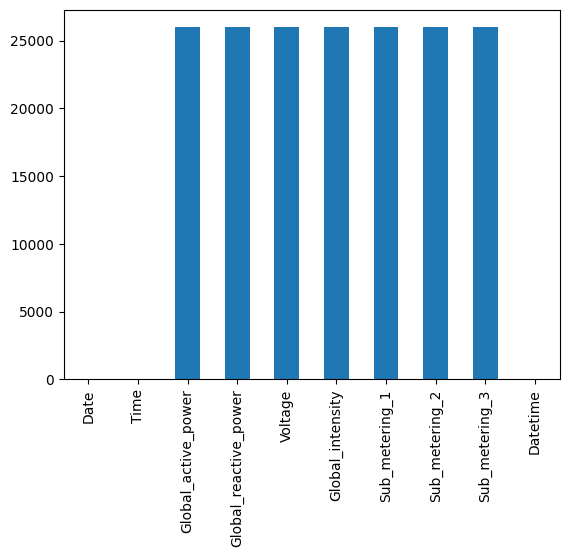

In [13]:
df.isna().sum().plot.bar()

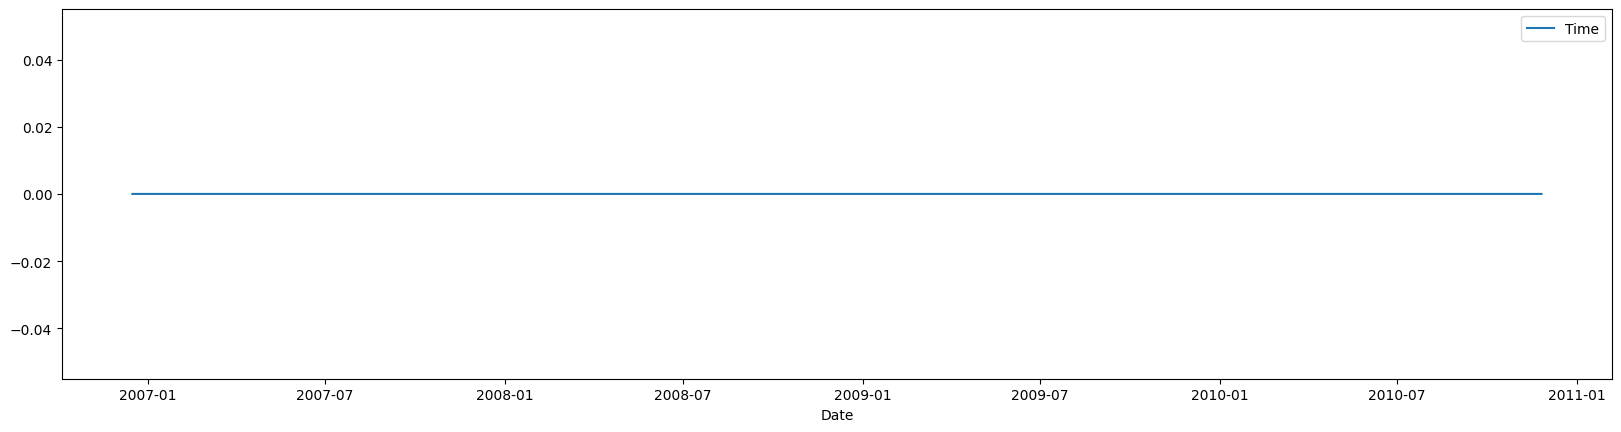

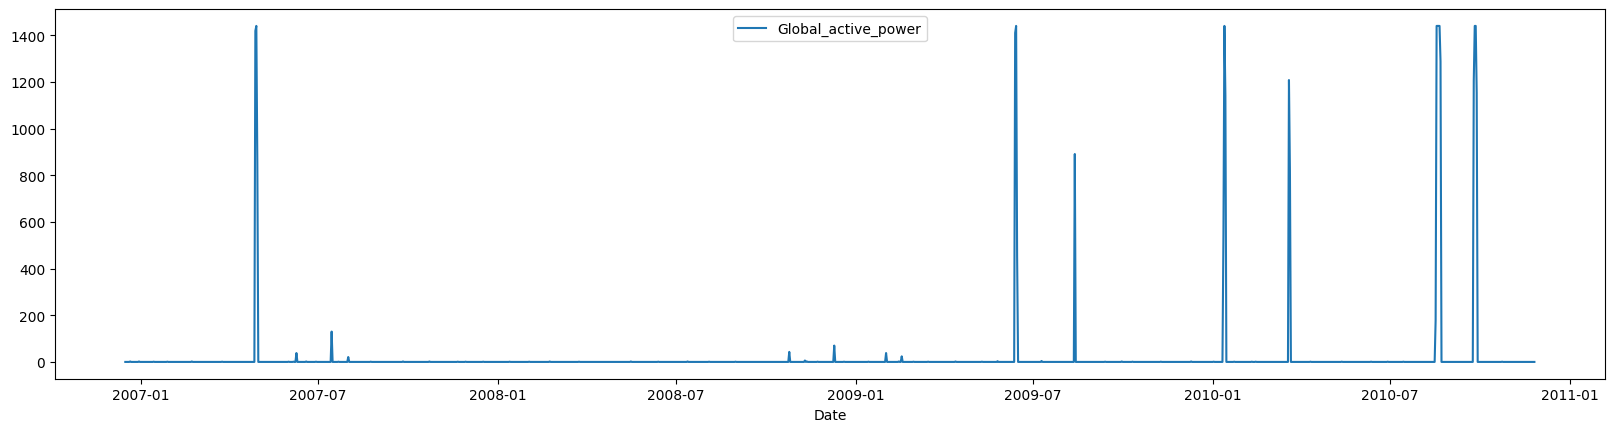

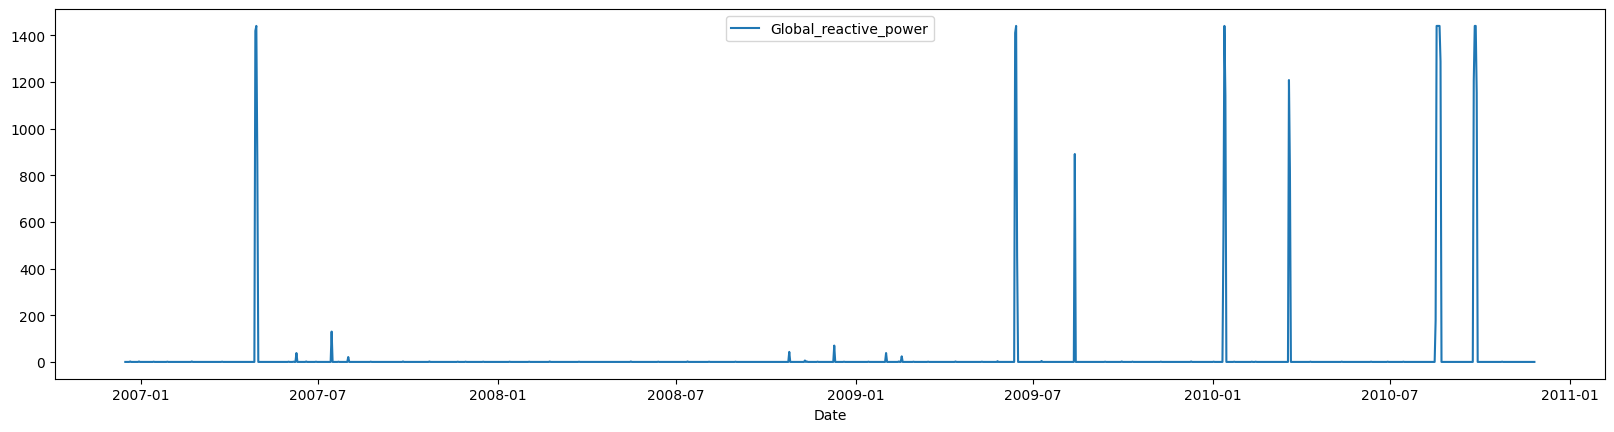

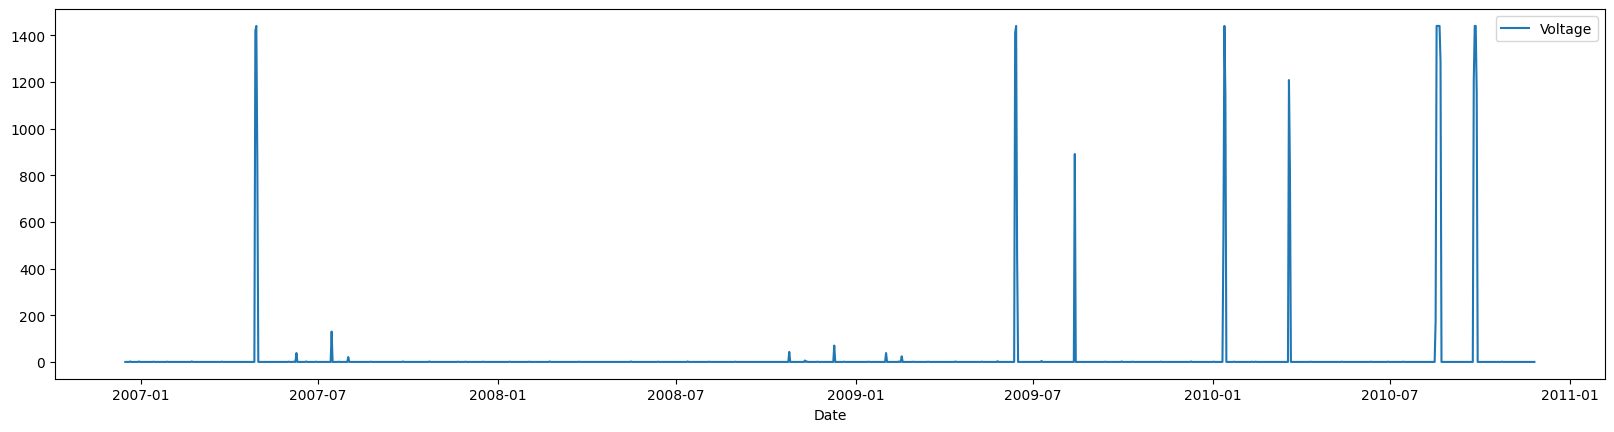

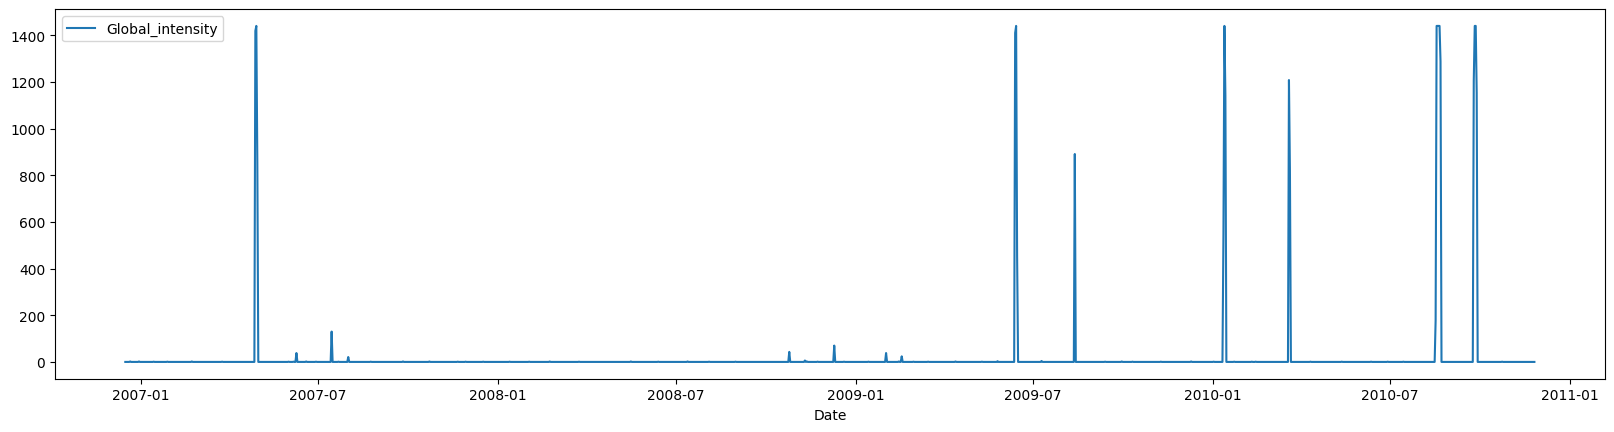

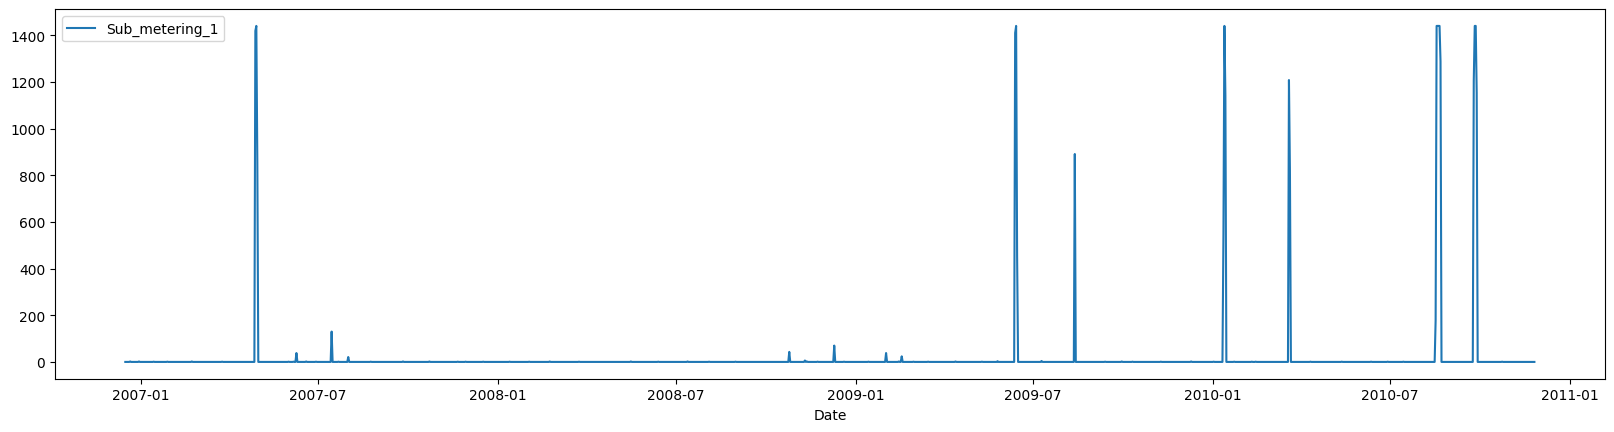

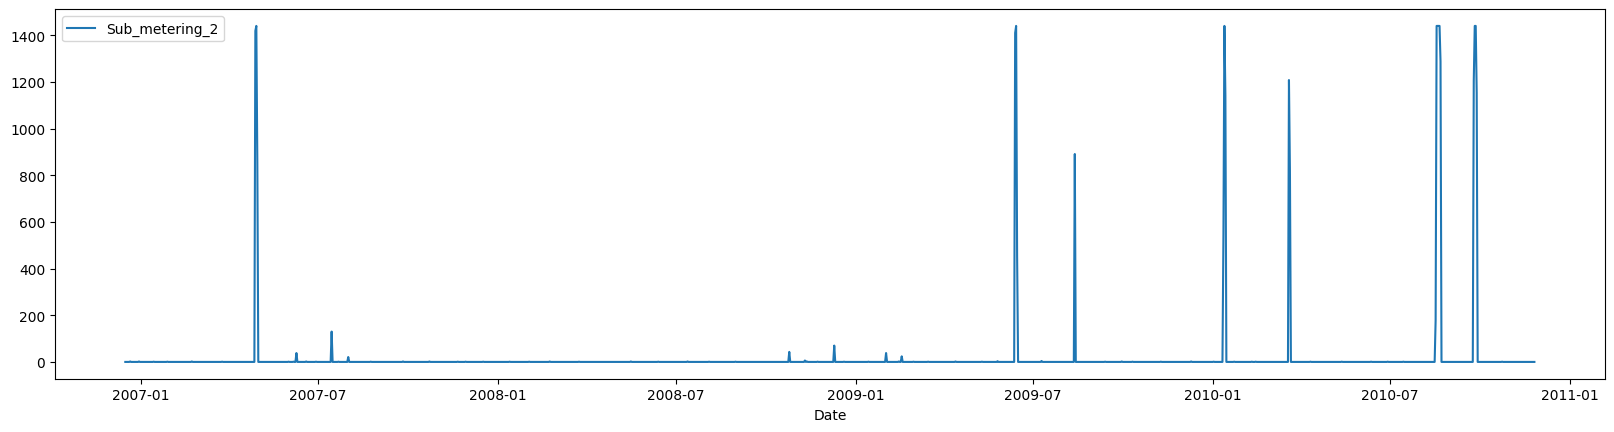

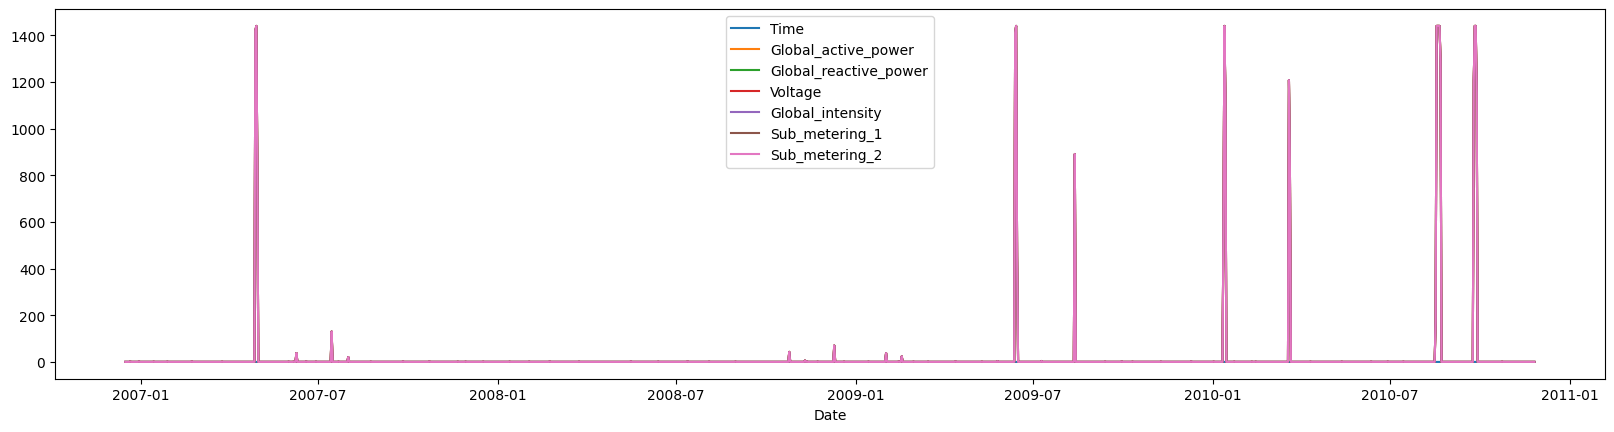

In [14]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
for i in range(1, len(df_na.columns)-2):
    ax = df_na.plot('Date', df_na.columns[i: i+1])
    ax.figure.set_figwidth(20)

ax = df_na.plot(x = 'Date', y = df_na.columns[1: -2])
ax.figure.set_figwidth(20)

In [15]:
# ax = df_na.plot(x="Date", y=df_na.columns[1:-2], kind="bar", rot=0)
# ax.figure.set_figwidth(20)
# ax.figure.set_figheight(10)
# ax.set_ylim(0, 800)

(0.0, 100.0)

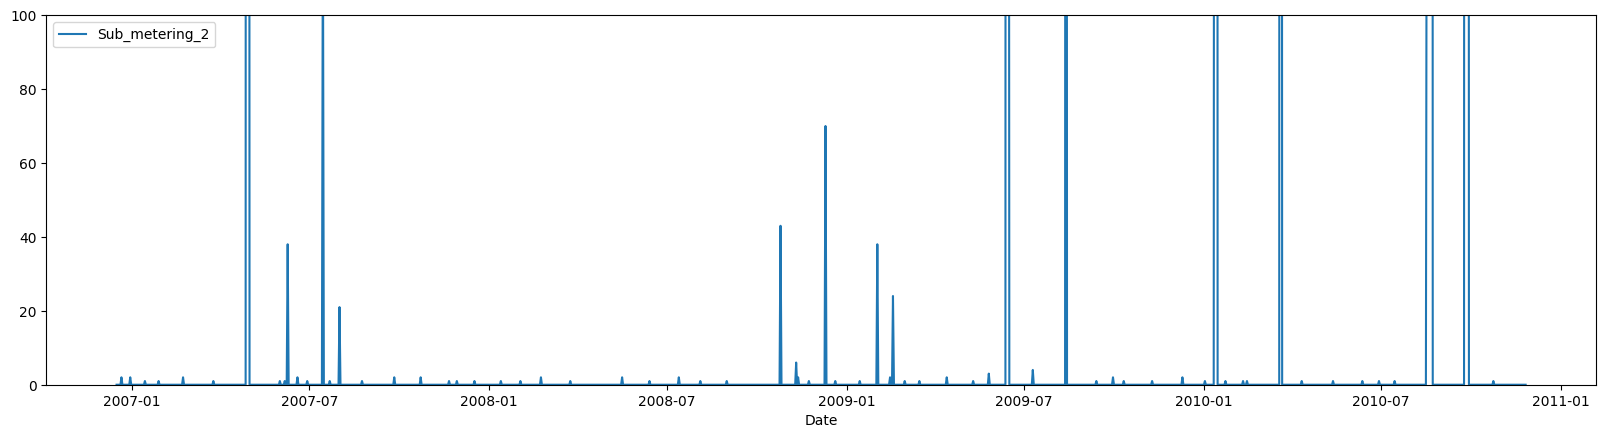

In [16]:
ax = df_na.plot('Date', df_na.columns[-3])
ax.figure.set_figwidth(20)
ax.set_ylim(0, 100)

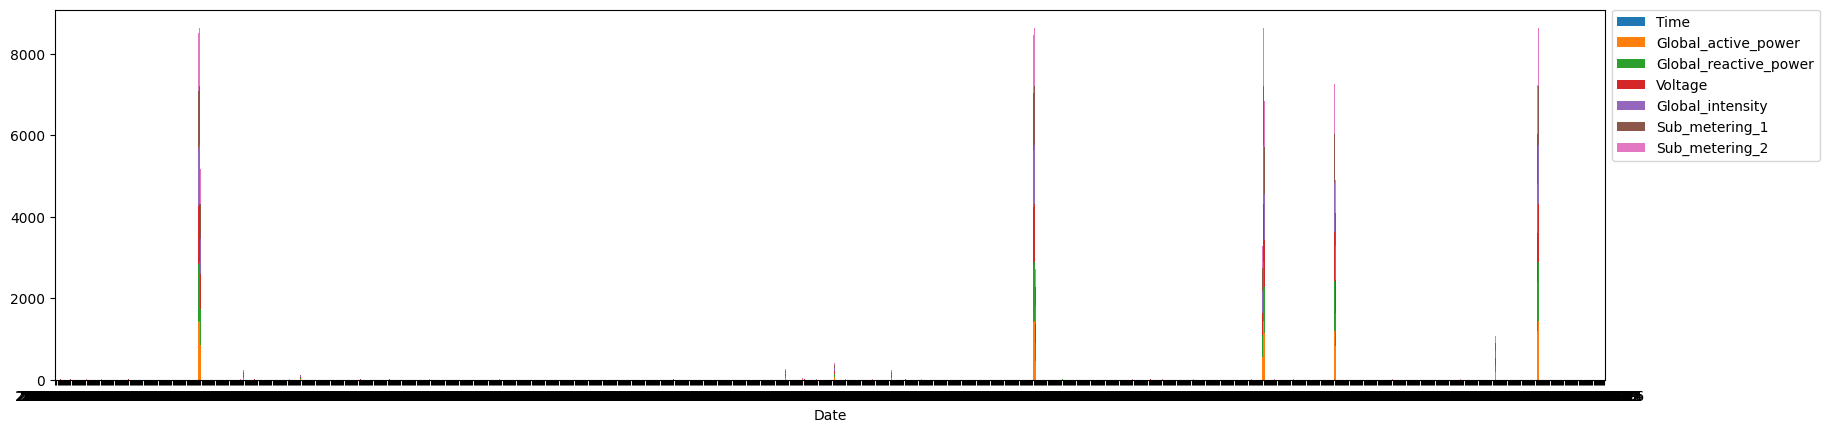

In [17]:
ax = df_na.plot(x="Date", y=df_na.columns[1: -2], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.figure.set_figwidth(20)

(0.0, 100.0)

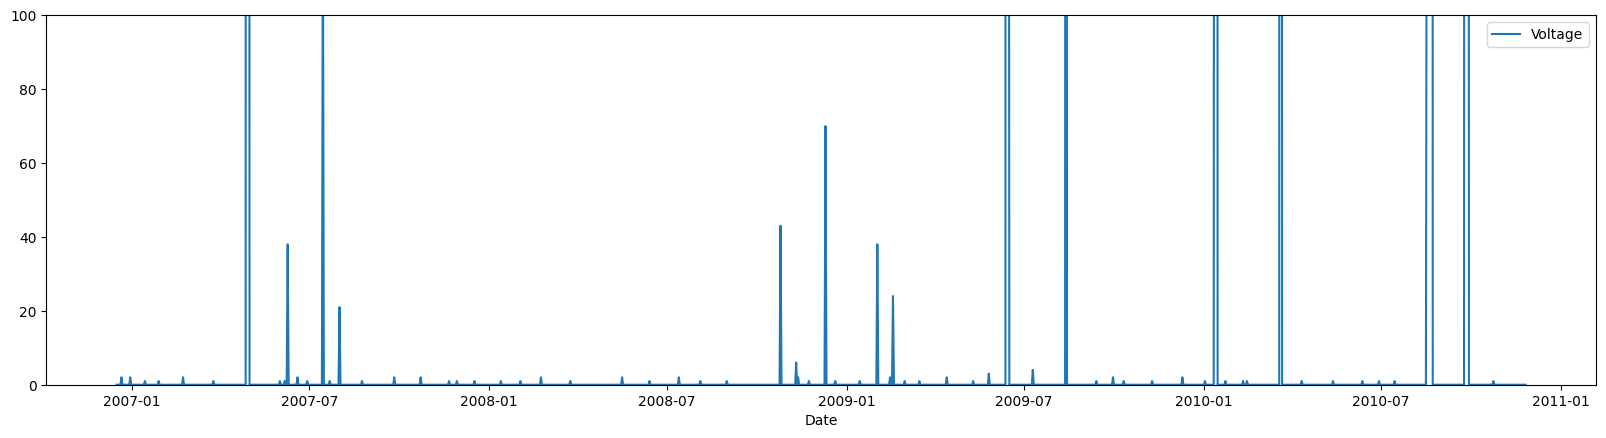

In [18]:
ax = df_na.plot('Date', df_na.columns[-6])
ax.figure.set_figwidth(20)
ax.set_ylim(0, 100)

**Q: What do you notice about the pattern of missing data?**

A: The missing data can be categorized into several groups.
* 1) The first group, which is most easy to spot, is nearly without exception characterized dates or series of dates wherein nearly all the variables are missing very similar amounts of data entries for each variable. If one plots the data in a stacked bar, showing cumulative missing entries labeled for each variable, one can see this is almost always the case as shown below. This group may represent instrument-level failures - perhaps where the device's power was removed for a day (or several) while network connectivity remained. 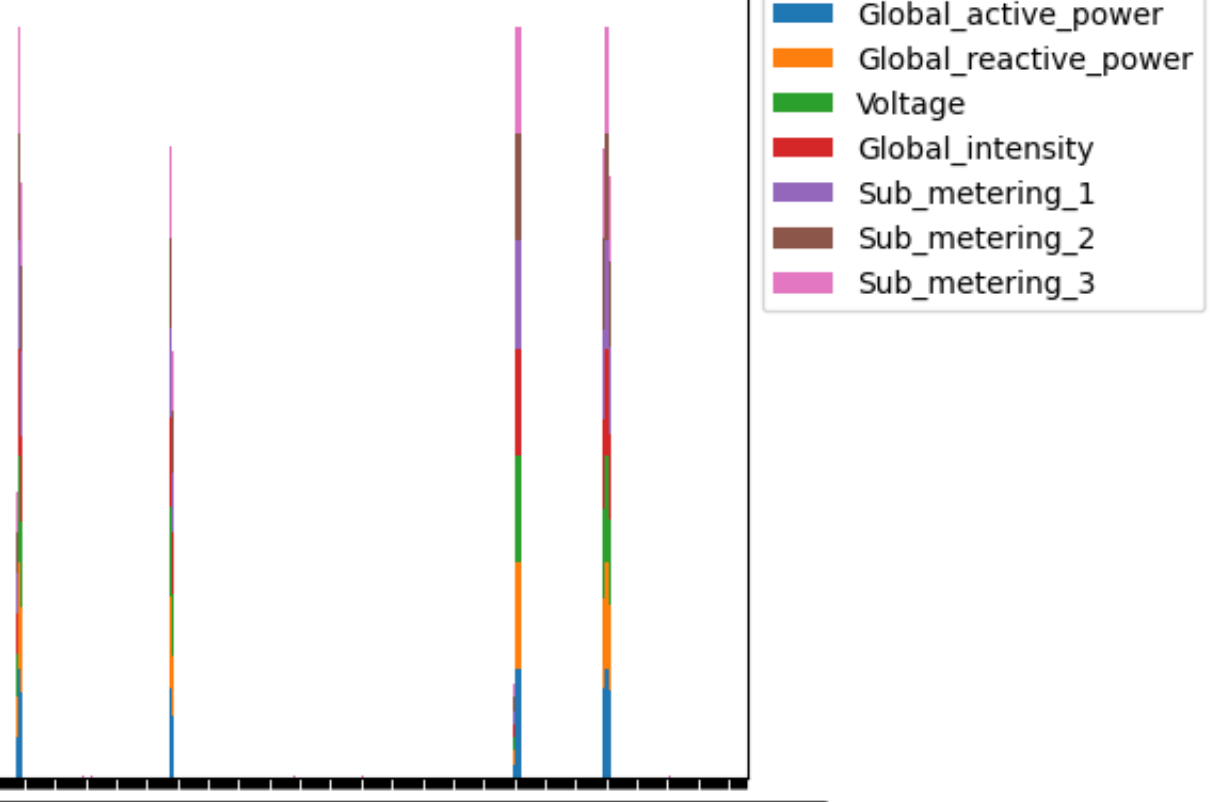
* 2) The second group, which may require zooming into the plot or thresholding the y axis, is categorized by shorter term failures shared by multiple variables. A zoomed-in snippet of the stacked plot below best illustrates these cases. It is noteworthy that each of these cases only spans for a single date's timestamp, illustrating shorter term instrument-level failures - perphaps power outages or network outages. 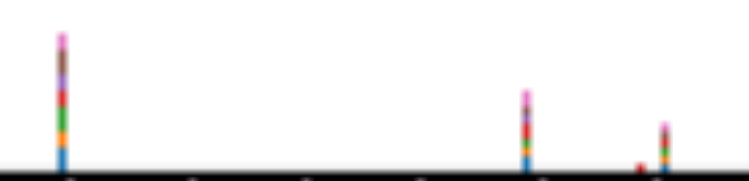
* 3) The third and final group, which certainly requires a very close look at the plots, is characterized by very short sets of missing data from a single variable. A zoomed in snippet of the stacked plot below best illustrates how these cases are marked only by a single variable's missing data and that they tend to be only for fairly short sequences of missing values - typically no more than 20 or 30. 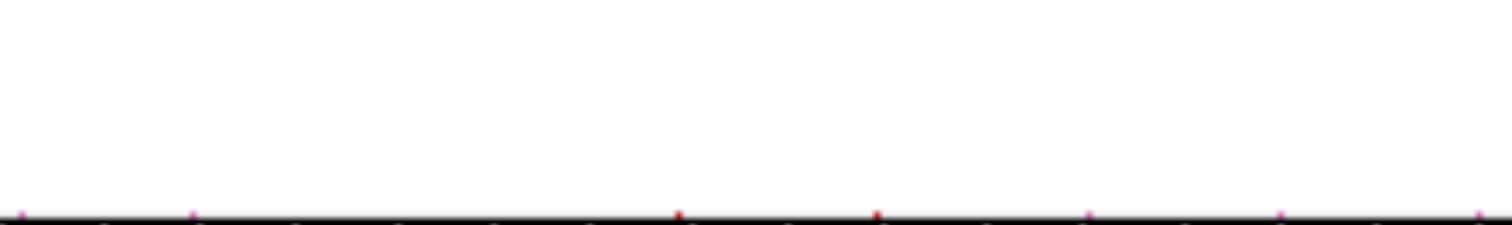 

Additionally, this 3rd group is largely characterized by failures largely in Sub_metering_3 and in Global Intensity, which are respectively shown in the plots below. So the third group's Probable Cause of Failure (PCoF) may be intermittent sensor-level failures perhaps in those two measurements. 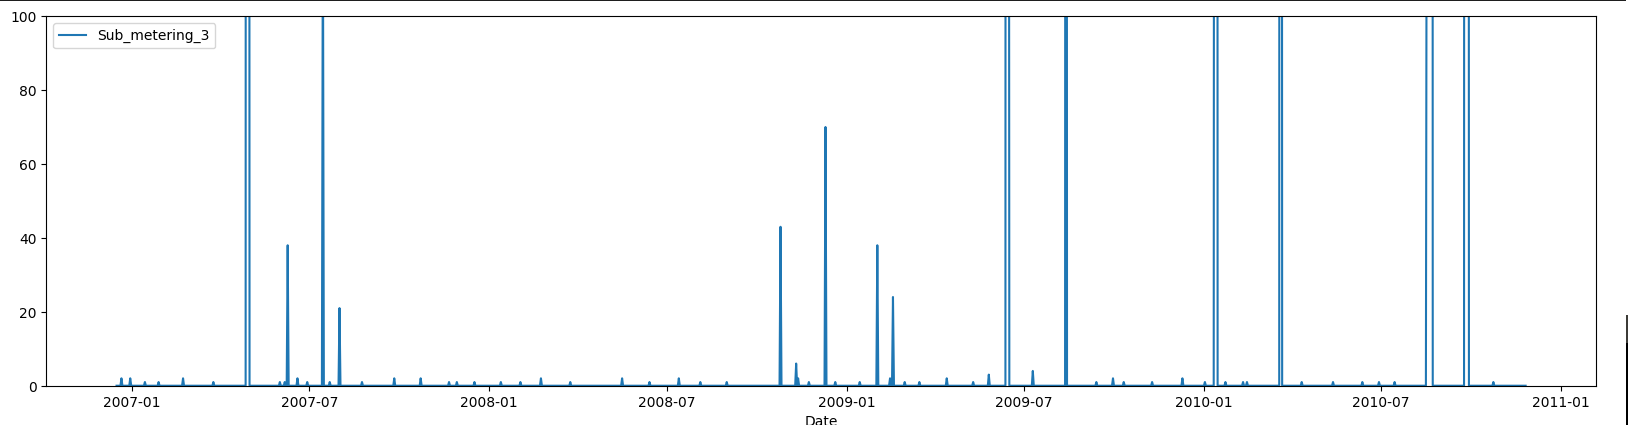 
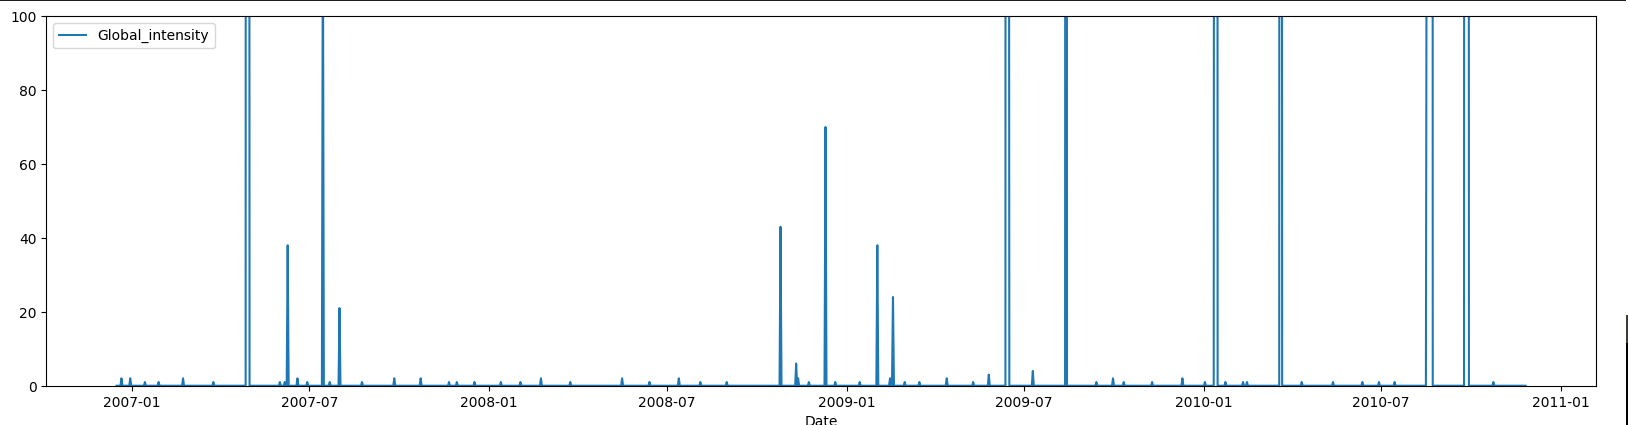
**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Removing the missing values really depends on what AI/ML models one wishes to build based on the data. If there is PCoF analysis desired, it may be worthwile to set the n/a values to 0 or an impossible value to indicate lack of measurement. 

If the desired application might be more on analytics of power readings from the sensors, perhaps statistically altering or removing all days where the case 1 and 2 data occurs would be best to avoid trying to analyze blackouts/failures. It's likely that a given power readings application may involve LTSM models or some AI/ML that leverages time-series data, in which case it would be best to try to avoid removing data.

The missing values for any given column could be set to a statistical representation of the remaining data - such as the mean, or forward filling the previously-known values. Another option is that the missing sub-metering values may be able to be calculated as some aggregates of the other values. For example, given that there are quite a few scenarios with missing values for Sub_metering_3, an aggregate could be assembled by converting the global intensity from kilowatts/min to watt hours and subtracting sub_metering_1 and sub_metering 2 to compute values for the water heater and air conditioner. However, there is a robust amount of data entries even if all 25000 or so missing entries are removed, there are still over 2,075,000 values remaining for training/testing data. 

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [19]:
#clean up missing data here
for col in range(len(df.columns)):
        if df.columns[col] == 'Date' or df.columns[col] == 'Datetime' or df.columns[col] == 'Time':
                continue
        df.iloc[:,col]=df.iloc[:,col].fillna(df.iloc[:,col].mean())

In [20]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [21]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,239.0200,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6300,0.1020,240.9600,2.8000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5200,0.1920,242.8600,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0507,0.1120,3.2196,4.4165,6.1144,5.7855,8.3842,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the raw (untransformed) data.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

I selected Global_active_power, Voltage, Global_reactive_power, and Sub_metering_3 as my variables. Part of the reason for this is that I didn't want to select global intensity, since the current being consumed by the house should be a direct parameter in the function of power usage (power = current * voltage). The Sub_metering variables are each measuring the local power consumptions of different rooms, so they should be a cumulative sum in the function for global power usage as well, however I thought it would be interesting to look at a particular room's usage over different time-sampled frequencies. I chose Sub_metering_3 for AC and Water Heater because both of these components are very power-intensive and are also very weather-intensive. Obviously people tend to use AC when their home is too warm. And then voltage may give some insights into power usage trends and general availability as well - same for the reactive power. Global_active_power may very well be the target variable - either way it represents a very high-level idea on trends for home power consumption which should certainly not be skipped in visualization.

A: 

<AxesSubplot: xlabel='Datetime'>

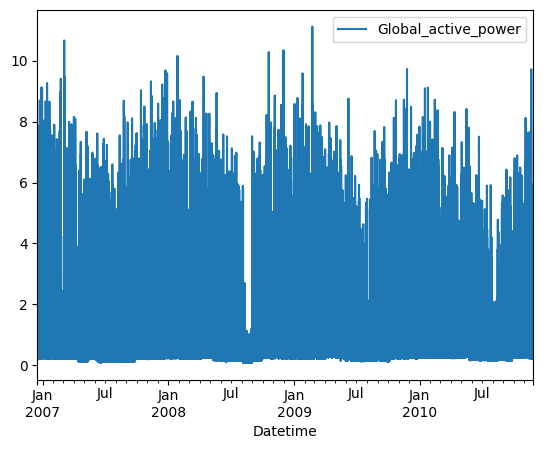

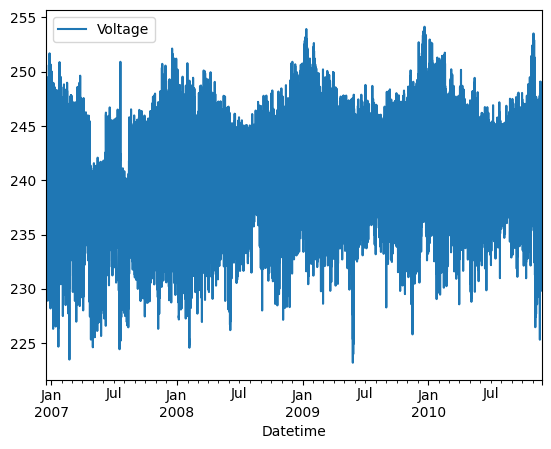

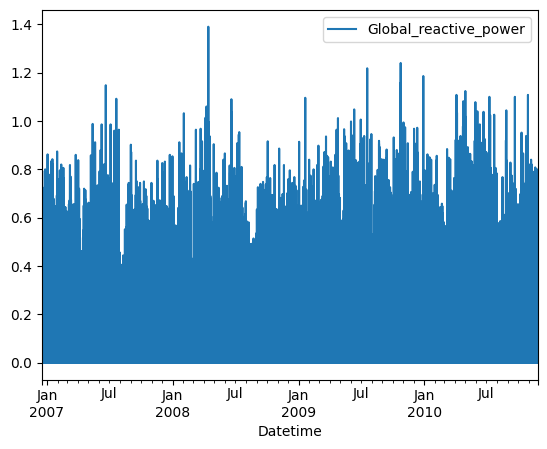

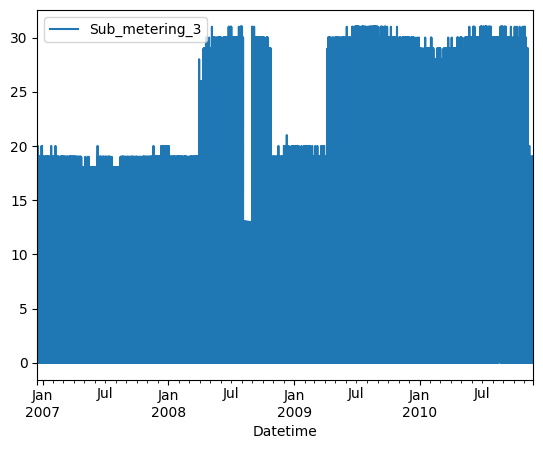

In [22]:
df.plot('Datetime', 'Global_active_power')
df.plot('Datetime', 'Voltage')
df.plot('Datetime', 'Global_reactive_power')
df.plot('Datetime', 'Sub_metering_3')

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The visualization is certainly useful, especially plots that have been smoothed with sums or moving averages. 
* For Global_active power, one can clearly see that during November - February there is a spike in global active power, perhaps indicating more heating being used to keep home swar, and likewise a dip in summer months to be expected.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

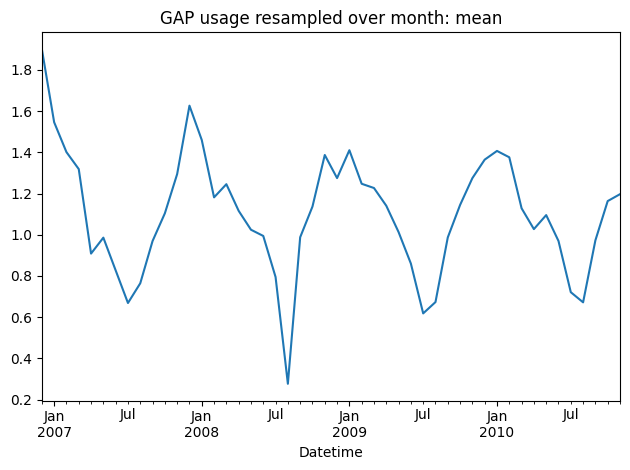

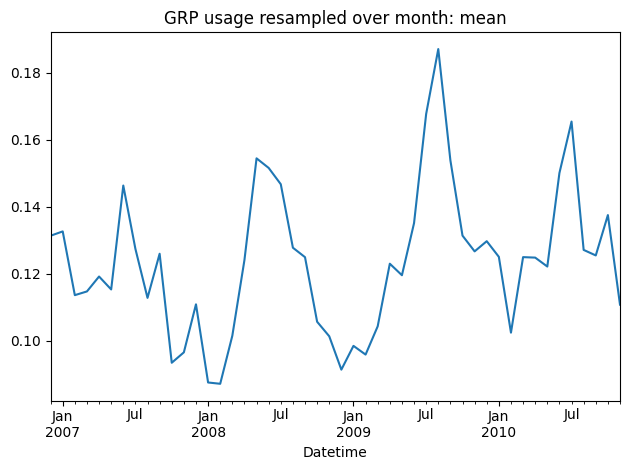

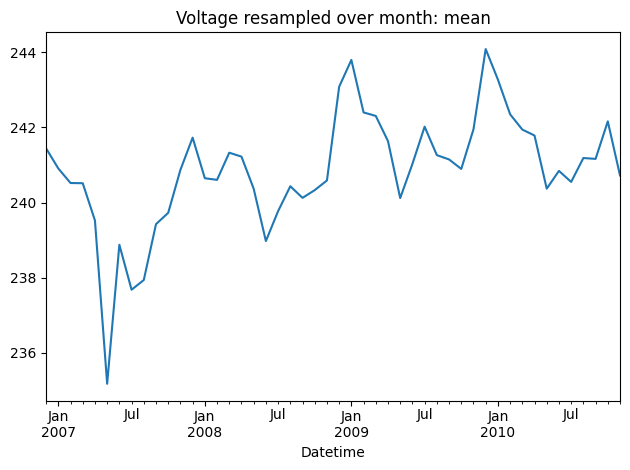

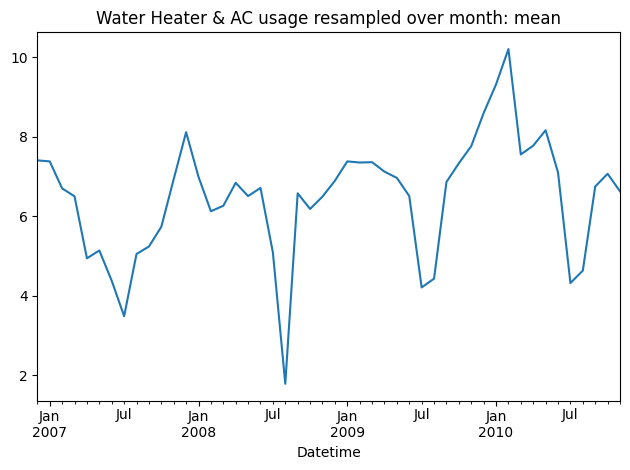

In [24]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df_group = df.set_index('Datetime')

df_group.Global_active_power.resample('M').mean().plot(title='GAP usage resampled over month: mean')
plt.tight_layout()
plt.show()

df_group.Global_reactive_power.resample('M').mean().plot(title='GRP usage resampled over month: mean')
plt.tight_layout()
plt.show()

# df.Global_intensity.resample('M').mean().plot(title='Global Intensity resampled over month: mean')
# plt.tight_layout()
# plt.show()

df_group.Voltage.resample('M').mean().plot(title='Voltage resampled over month: mean')
plt.tight_layout()
plt.show()


# df.Sub_metering_1.resample('M').mean().plot(title='Kitchen usage resampled over month: mean')
# plt.tight_layout()
# plt.show()

# df.Sub_metering_2.resample('M').mean().plot(title='Laundry Room usage resampled over month: mean')
# plt.tight_layout()
# plt.show()

df_group.Sub_metering_3.resample('M').mean().plot(title='Water Heater & AC usage resampled over month: mean')
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: There are some similarly-synchronized spikes and dips between the chosen variables, particularly in months like january and july. This is particularly the case with GRP, GAP, and the water-heater usage.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above.**

In [30]:
#compute your moving average here
df_group['30d_moving_avg_gap'] = df_group['Global_active_power'].rolling(window=30).mean()
df_group['30d_moving_avg_grp'] = df_group['Global_reactive_power'].rolling(window=30).mean()
df_group['30d_moving_avg_voltage'] = df_group['Voltage'].rolling(window=30).mean()
df_group['30d_moving_avg_water_heater'] = df_group['Sub_metering_3'].rolling(window=30).mean()

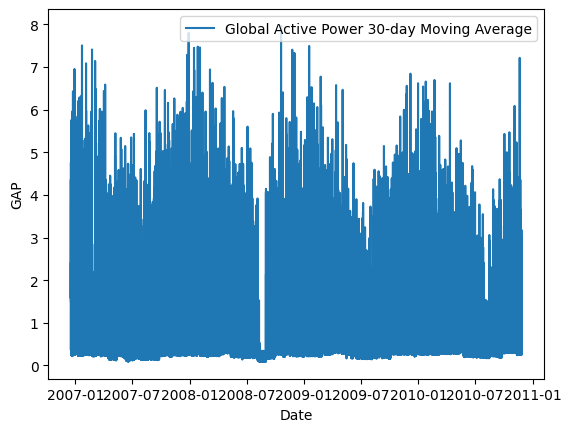

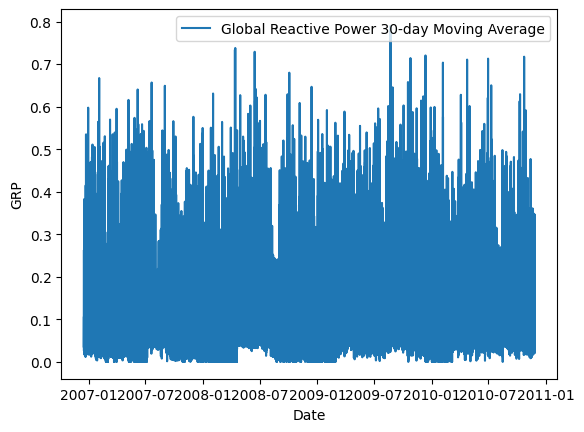

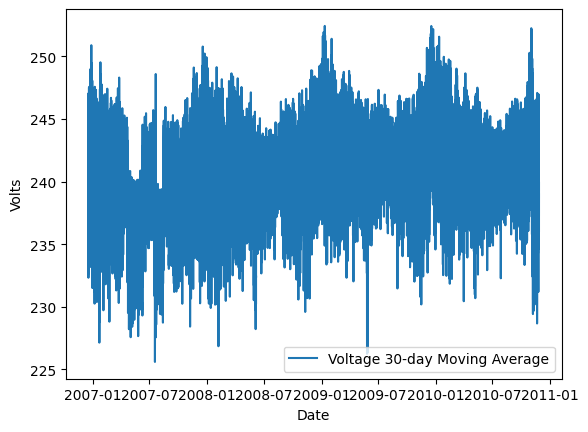

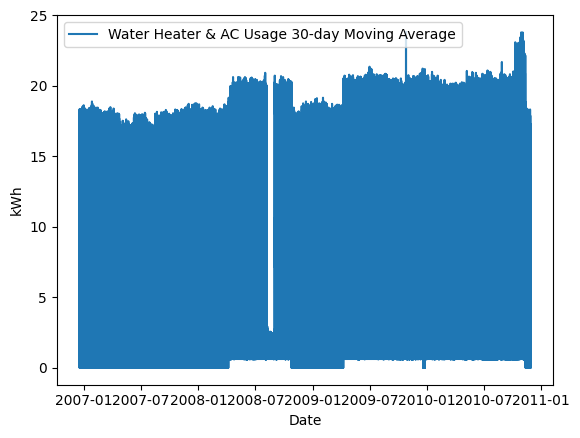

In [31]:
#build your line chart on the moving average here
plt.plot(df_group['30d_moving_avg_gap'], label='Global Active Power 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('GAP')
plt.legend()
plt.show()

plt.plot(df_group['30d_moving_avg_grp'], label='Global Reactive Power 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('GRP')
plt.legend()
plt.show()

plt.plot(df_group['30d_moving_avg_voltage'], label='Voltage 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volts')
plt.legend()
plt.show()

plt.plot(df_group['30d_moving_avg_water_heater'], label='Water Heater & AC Usage 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average tends to show less trends for seasonal values, but it presents better graphs for waveform-patterns, such as voltage. It is also stronger for building trends, showing things like water heater and AC usage moving steadily upwards.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

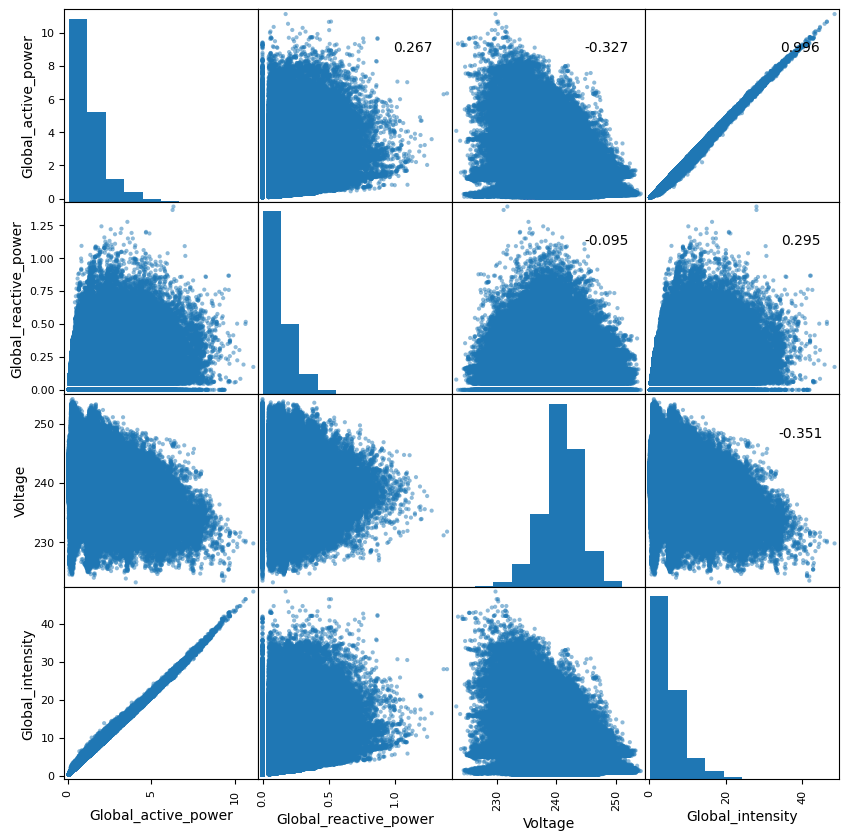

In [ ]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: 
* Global Active Power and Global Intensity are directly correlated where the global active power is about 1/4th the global intensity. The correlation value of the raw data is .996, which is so high that these variables are statistically nearly the same.
* Global intensity (and global Active Power) are at their highest with lower voltage values, and drop significantly with higher voltage values -> 250. This makes sense given that power is a function of the product of voltage and current. This correlation is much weaker than that of Global Active Power and Global Intensity
* Global reactive_power is at the highest with low Global Active Power and Global Intensity values having about .267 correlation value with global active power. Given that we know these two variables should be much more directly correlated, it's likely that running correlation matrices on frequency-sampled data would yield much stronger results.
* Global Reactive Power is highest at a voltage of 240, and drops down as the absolute value of the difference of 240V and the current voltage increases.

This affects how we use the data in downstream tasks because it allows one to make decisions on the most valuable variables that will be fed into a model. Variables with high correlation (like Global Active Power & Global Intensity) will add unnecessary dimensionality to the model and may even lead to overfitting models that show bias for a certain group of variables. Variables with some correlation can bring in further EDA discoveries and may be used in some aggregate of value that leverages expert knowledge to reduce dimensionality within a downstream model. Variables with much lower correlation values towards another may be independent of another and are possibly of value to keep in regards to corresponding with a target variable. 